# Credit Card Fraud Detection

# import libraries

In [79]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [65]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [67]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [68]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [69]:
train_df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

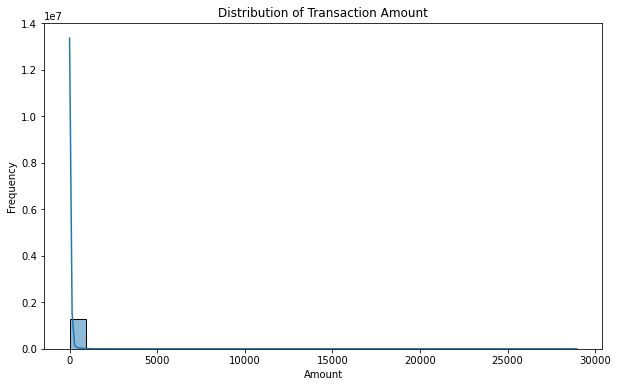

In [37]:
# histogram of transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(train_df['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

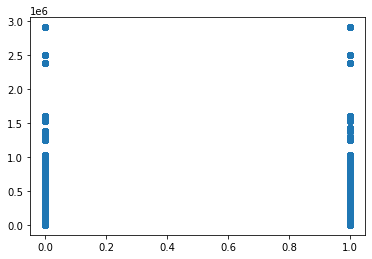

In [40]:
plt.scatter(train_df["is_fraud"],train_df["city_pop"])

In [70]:
# Fill missing values
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [71]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_df[features]
y = train_df['is_fraud']

In [72]:
X

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


In [73]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model

In [86]:
# Build and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.83      0.46      0.59      1520

    accuracy                           1.00    259335
   macro avg       0.91      0.73      0.80    259335
weighted avg       1.00      1.00      1.00    259335



In [ ]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")